<a href="https://colab.research.google.com/github/svkalenichenko/my-projects/blob/main/Project_Contacts_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Исследовательский анализ данных (EDA) датасета Contacts. Первый взгляд на данные

Рассмотрим основные этапы:

Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Исходные Данные предоставлены в формате xlsx. Считываем их через Pandas

In [2]:
contacts = pd.read_excel('/content/Contacts (Done).xlsx')
contacts.head()

,Id,Contact Owner Name,Created Time,Modified Time
0,5805028000000645014,Rachel White,27.06.2023 11:28,22.12.2023 13:34
1,5805028000000872003,Charlie Davis,03.07.2023 11:31,21.05.2024 10:23
2,5805028000000889001,Bob Brown,02.07.2023 22:37,21.12.2023 13:17
3,5805028000000907006,Bob Brown,03.07.2023 05:44,29.12.2023 15:20
4,5805028000000939010,Nina Scott,04.07.2023 10:11,16.04.2024 16:14


Получение общего представления о
данных


In [3]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  18548 non-null  int64 
 1   Contact Owner Name  18548 non-null  object
 2   Created Time        18548 non-null  object
 3   Modified Time       18548 non-null  object
dtypes: int64(1), object(3)
memory usage: 579.8+ KB


In [4]:
contacts.describe()

,Id
count,1.854800e+04
mean,5.805028e+18
std,1.566362e+07
min,5.805028e+18
25%,5.805028e+18
50%,5.805028e+18
75%,5.805028e+18
max,5.805028e+18


Преобразование необработанных данных

In [5]:
# Преобразование столбцов Created Time и Modified Time в формат datetime с указанием формата
contacts['Created Time'] = pd.to_datetime(contacts['Created Time'], format='%d.%m.%Y %H:%M')
contacts['Modified Time'] = pd.to_datetime(contacts['Modified Time'], format='%d.%m.%Y %H:%M')

In [6]:
# Преобразование столбца Contact Owner Name в категориальный
contacts['Contact Owner Name'] = contacts['Contact Owner Name'].astype('category')

Количество отсутствующих значений

In [7]:
contacts.isnull().sum()

,0
Id,0
Contact Owner Name,0
Created Time,0
Modified Time,0


Количество уникальных и дублированных значений

In [8]:
contacts.nunique()         # тут видим что ID все уникальные, можно сделать этот столбец Индексами

,0
Id,18548
Contact Owner Name,28
Created Time,17921
Modified Time,16580


Проверяем есть ли в данных полностью повторяющиеся строки, (тут нет дубликатов)

In [9]:
contacts[contacts.duplicated()]

,Id,Contact Owner Name,Created Time,Modified Time


In [10]:
contacts.duplicated().sum()

0

Делаем столбец ID Индексами  (важно сначала проверяем дубликаты строки, потом устанавливаем Столбец Индексами)

In [11]:
contacts = contacts.set_index('Id')

In [12]:
contacts.head()

,Contact Owner Name,Created Time,Modified Time
Id,,,
5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00
5805028000000872003,Charlie Davis,2023-07-03 11:31:00,2024-05-21 10:23:00
5805028000000889001,Bob Brown,2023-07-02 22:37:00,2023-12-21 13:17:00
5805028000000907006,Bob Brown,2023-07-03 05:44:00,2023-12-29 15:20:00
5805028000000939010,Nina Scott,2023-07-04 10:11:00,2024-04-16 16:14:00


In [13]:
# У одного контакта имя ответственного лица за его управление False, меняю на Unknown
contacts[contacts['Contact Owner Name']==False]

,Contact Owner Name,Created Time,Modified Time
Id,,,
5805028000008772190,False,2023-09-24 09:01:00,2023-10-13 16:44:00


In [14]:
# Заменяем False на 'Unknown'
contacts['Contact Owner Name'] = contacts['Contact Owner Name'].cat.rename_categories(lambda x: 'Unknown' if x is False else x)

In [15]:
contacts[contacts['Contact Owner Name']== 'Unknown']

,Contact Owner Name,Created Time,Modified Time
Id,,,
5805028000008772190,Unknown,2023-09-24 09:01:00,2023-10-13 16:44:00


In [16]:
contacts.describe()

,Created Time,Modified Time
count,18548,18548
mean,2024-01-24 14:00:21.679965696,2024-02-15 07:41:24.814535168
min,2023-06-27 11:28:00,2023-07-06 10:54:00
25%,2023-11-15 16:40:45,2023-12-09 12:43:00
50%,2024-02-01 18:30:00,2024-02-28 22:21:30
75%,2024-04-12 16:37:15,2024-04-26 22:02:30
max,2024-06-21 15:30:00,2024-06-21 15:32:00


Вывод описательных статистик

In [17]:
contacts.describe(include='all').T  # Транспонирование таблицы

,count,unique,top,freq,mean,min,25%,50%,75%,max
Contact Owner Name,18548,28,Charlie Davis,2018,NaN,NaN,NaN,NaN,NaN,NaN
Created Time,18548,NaN,NaN,NaN,2024-01-24 14:00:21.679965696,2023-06-27 11:28:00,2023-11-15 16:40:45,2024-02-01 18:30:00,2024-04-12 16:37:15,2024-06-21 15:30:00
Modified Time,18548,NaN,NaN,NaN,2024-02-15 07:41:24.814535168,2023-07-06 10:54:00,2023-12-09 12:43:00,2024-02-28 22:21:30,2024-04-26 22:02:30,2024-06-21 15:32:00



## Столбец Имя владельца контакта (Contact Owner Name):
Уникальных владельцев контактов: 28.
Самый частый владелец контакта: Charlie Davis, который появляется 2018 раз.
Это категориальная переменная.


## Столбец Время создания контакта (Created Time):
Общее количество записей: 18548.
Минимальная дата создания: 27 июня 2023 года.
Максимальная дата: 21 июня 2024 года.
Среднее значение (mean): 24 января 2024 года.
25%, 50% и 75% квартиль показывают, что 25% контактов были созданы до 15 ноября 2023 года, а 75% — до 12 апреля 2024 года.


## Столбец Время изменения контакта (Modified Time):
Общее количество записей: 18548.
Минимальная дата изменения: 6 июля 2023 года.
Максимальная дата изменения: 21 июня 2024 года.
Среднее значение (mean): 15 февраля 2024 года.
50% всех изменений произошли до 28 февраля 2024 года.
Диапазон дат изменений контактов довольно широк, что может указывать на активное ведение этих записей в течение длительного периода времени.

Данные готовы к дальнейшему анализу, сохраняем в  файл и скачиваем себе на комп что б не потерять их

In [18]:
import pickle

# Сохранение DataFrame в файл с помощью pickle
with open('contacts.pkl', 'wb') as f:
    pickle.dump(contacts, f)

In [19]:
# Загрузка DataFrame из файла с помощью pickle
with open('contacts.pkl', 'rb') as f:
    contacts = pickle.load(f)

Открываем и проверяем всё ли корректно сохранилось и открывается ли

In [20]:
print(contacts.isnull().sum())
contacts.info()
contacts.head()

Contact Owner Name    0
Created Time          0
Modified Time         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 18548 entries, 5805028000000645014 to 5805028000056907001
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Contact Owner Name  18548 non-null  category      
 1   Created Time        18548 non-null  datetime64[ns]
 2   Modified Time       18548 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2)
memory usage: 453.1 KB


,Contact Owner Name,Created Time,Modified Time
Id,,,
5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00
5805028000000872003,Charlie Davis,2023-07-03 11:31:00,2024-05-21 10:23:00
5805028000000889001,Bob Brown,2023-07-02 22:37:00,2023-12-21 13:17:00
5805028000000907006,Bob Brown,2023-07-03 05:44:00,2023-12-29 15:20:00
5805028000000939010,Nina Scott,2023-07-04 10:11:00,2024-04-16 16:14:00


In [21]:
# contacts.to_excel('Contacts_saved.xlsx')

In [22]:
# contacts = pd.read_excel('/content/Contacts_saved.xlsx')
# contacts.head()

Одномерный анализ

Визуализация категориальных переменных

In [23]:
# Убрала предупреждения о поведение функции, которая может измениться в будущем, но это не ошибка
import warnings

warnings.filterwarnings("ignore")

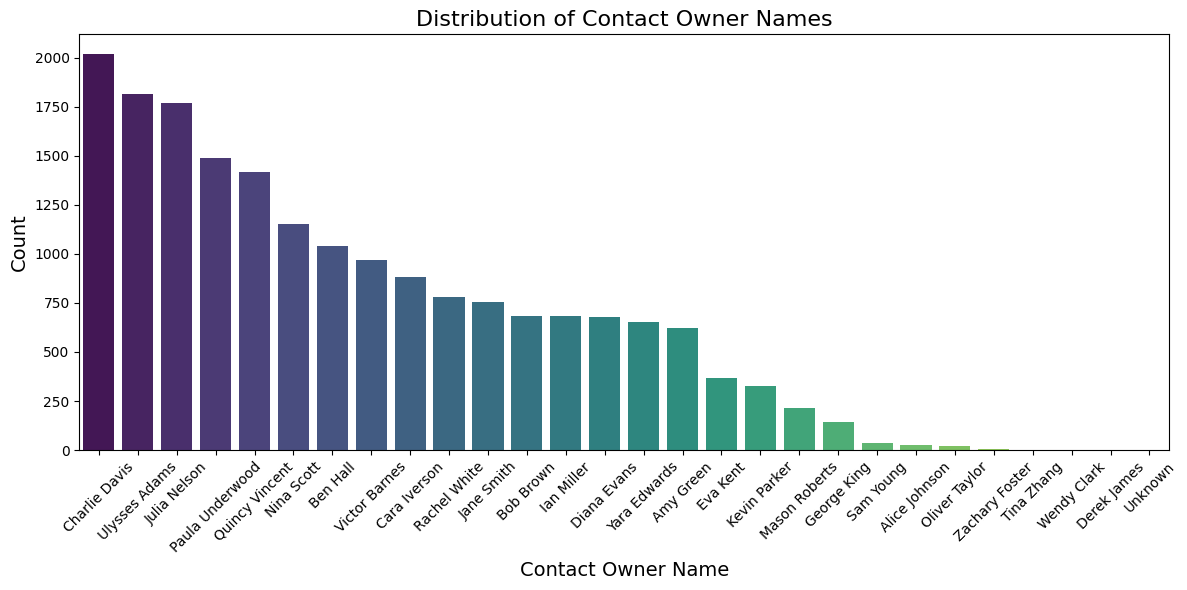

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убираем строки с "Unknown" в столбце 'Contact Owner Name'
filtered_contacts = contacts[contacts['Contact Owner Name'] != 'Unknown']

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_contacts, x='Contact Owner Name', order=filtered_contacts['Contact Owner Name'].value_counts().index, palette='viridis', legend=False)

# Настройка графика
plt.title('Distribution of Contact Owner Names', fontsize=16)
plt.xlabel('Contact Owner Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Рассчитываем разницу во времени
contacts['Time Difference'] = (contacts['Modified Time'] - contacts['Created Time']).dt.days
print(contacts['Time Difference'].head(10))

# Рассчитываем сводную статистику для Time Difference
mean_diff = contacts['Time Difference'].mean()
median_diff = contacts['Time Difference'].median()
mode_diff = contacts['Time Difference'].mode()[0]
range_diff = contacts['Time Difference'].max() - contacts['Time Difference'].min()

print(f"Среднее значение: {mean_diff}")
print(f"Медиана: {median_diff}")
print(f"Мода: {mode_diff}")
print(f"Диапазон: {range_diff}")

Id
5805028000000645014    178
5805028000000872003    322
5805028000000889001    171
5805028000000907006    179
5805028000000939010    287
5805028000000942003     13
5805028000000961001     93
5805028000000964025    343
5805028000000964068     12
5805028000000968001    350
Name: Time Difference, dtype: int64
Среднее значение: 21.489378908777226
Медиана: 0.0
Мода: 0
Диапазон: 350


## **Выводы**:

-- Большинство контактов обновляются сразу после создания, так как мода и медиана равны 0.

-- Есть контакты, которые обновляются намного позже, раз диапазон достигает 350 дней, а среднее значение — около 21 дня.

Contact Owner Name  Time Difference
     Oliver Taylor        47.736842
       George King        43.048611
     Alice Johnson        41.629630
         Bob Brown        38.654015
    Zachary Foster        37.250000
     Ulysses Adams        36.860683
        Jane Smith        36.314324
      Kevin Parker        33.492308
     Victor Barnes        30.088935
     Mason Roberts        28.640553
        Ian Miller        26.099415
      Julia Nelson        24.923686
        Nina Scott        24.453043
     Charlie Davis        21.493062
      Yara Edwards        21.189313
         Amy Green        17.521739
   Paula Underwood        14.790182
    Quincy Vincent        12.793079
          Ben Hall         8.665703
          Eva Kent         8.068493
      Cara Iverson         6.742045
       Diana Evans         6.438053
      Rachel White         3.153453
       Wendy Clark         2.500000
         Sam Young         0.837838
       Derek James         0.000000
        Tina Zhang         0

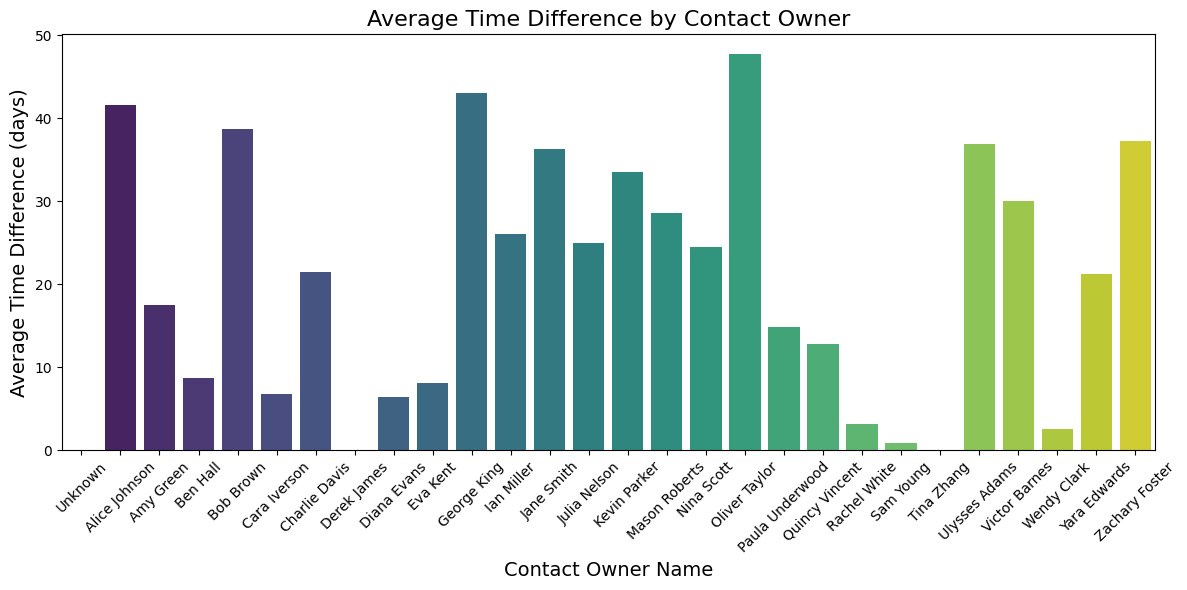

In [34]:
# Убираем строки с "Unknown" в столбце 'Contact Owner Name'
filtered_contacts = contacts[contacts['Contact Owner Name'].str.strip() != 'Unknown']

# Группируем, считаем среднюю разницу во времени и сбрасываем индекс
contact_owner_time_diff = filtered_contacts.groupby('Contact Owner Name')['Time Difference'].mean().reset_index()

# Сортируем от большего к меньшему
contact_owner_time_diff = contact_owner_time_diff.sort_values(by='Time Difference', ascending=False)

# Выводим результат
print(contact_owner_time_diff.to_string(index=False))

# Визуализируем среднюю разницу во времени
plt.figure(figsize=(12, 6))
sns.barplot(data=contact_owner_time_diff, x='Contact Owner Name', y='Time Difference', palette='viridis', legend=False)

# Настройка графика
plt.title('Average Time Difference by Contact Owner', fontsize=16)
plt.xlabel('Contact Owner Name', fontsize=14)
plt.ylabel('Average Time Difference (days)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Вывод уникальных значений в столбце 'Contact Owner Name'
print(contacts['Contact Owner Name'].unique())


['Rachel White', 'Charlie Davis', 'Bob Brown', 'Nina Scott', 'Alice Johnson', ..., 'Zachary Foster', 'Sam Young', 'Wendy Clark', 'Tina Zhang', 'Derek James']
Length: 28
Categories (28, object): ['Unknown', 'Alice Johnson', 'Amy Green', 'Ben Hall', ...,
                          'Victor Barnes', 'Wendy Clark', 'Yara Edwards', 'Zachary Foster']


## **Выводы**:

-- Лидеры по времени:

Oliver Taylor имеет наибольшее среднее время разницы (47.74), что может указывать на его высокую вовлеченность или количество сложных сделок.
George King и Alice Johnson следуют за ним, с средним временем 43.05 и 41.63 соответственно. Это также говорит о возможной сложности их сделок или высоком уровне взаимодействия с клиентами.

-- Низкие показатели:

На другом конце спектра находятся Derek James и Tina Zhang, у которых среднее время разницы составляет 0.00. Это может означать отсутствие активных взаимодействий или сделок.
Rachel White и Wendy Clark также имеют значительно низкие значения, что может свидетельствовать о низкой активности или сложности их дел. Нулевая разница во времени может также указывать на то, что сделки закрываются в тот же день, когда они были созданы.  Необходим дальнейший анализ.